In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline  
pd.set_option('max_colwidth', 1000)

In [3]:
train_data = pd.read_csv('data/sentiment_twitter/train_sentiment_ttk.tsv', sep='\t')
test_data = pd.read_csv('data/sentiment_twitter/test_sentiment_ttk.tsv', sep='\t')

In [4]:
train_data.head(n=15)

,label,text
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!"
5,-1,RT @f_u_c_k_y_o_u_: Билайн интернет стал полным говном
6,0,На Дне города в Тюмени «МегаФон» разыграет смартфон за лучшее селфи
7,0,"&amp;laquo;Ростелеком&amp;raquo; стал партнером всероссийского конкурса &amp;laquo;Поколение i&amp;raquo; на создание лучшего интернет-проекта для детей, о"
8,0,RT @parfenov1960: Сотовый оператор Мегафон проводит конкурс с розыгрышем 50 iPhone 5s. Для участия нужно... http://t.co/8SZYFgjtMe
9,1,«МегаФон» поможет контролировать расходы на Интернет за границей


In [5]:
test_data.head(n=15)

,label,text
0,-1,RT vzglyad: По делу о работе МТС в Узбекистане США предложили заморозить 300 млн
1,0,RT @kevinuyatukox: http://t.co/ljtrjq91v3 #Кредитные карты мегафон банка
2,0,#Оформить кредитную карту в банке мтс http://t.co/vv1B6PMWgH
3,0,#Как перевести деньги с билайна на кредитную карту
4,0,#Начальник отдела кредитного контроля оао мтс усачева н а
5,-1,На МТС завели дело за обман абонентов в Крыму http://t.co/0DpSupeFDU
6,-1,ФАС возбудила дело на МТС за ложь в рекламе\nhttp://t.co/RIbELhZLHZ\n #Crimea\n #News\n #НовостиКрыма
7,0,RT @kennethenozacuk: http://t.co/ds5kOamzx6 #Мтс банк кредитная карта проценты
8,-1,RT @vishtorskayaa: Отказано в доступе при установки драйвера модема мегафон #установки #модема
9,0,RT @Serg_58: Tele2 хочет продавать смартфоны под своим брендом #internet


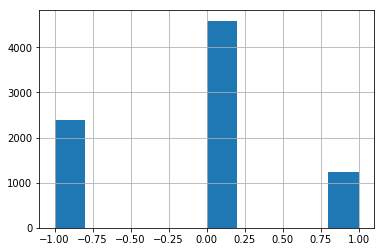

In [6]:
train_data.label.hist()

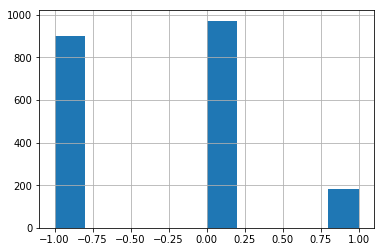

In [7]:
test_data.label.hist()

In [8]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_data.text.values) 

X_train = count_vectorizer.transform(train_data.text.values)
X_test = count_vectorizer.transform(test_data.text.values)

In [9]:
X_train.shape

(8208, 20511)

In [10]:
X_test.shape

(2054, 20511)

In [11]:
y_train = train_data.label.values
y_test = test_data.label.values

In [12]:
clf = LogisticRegression(penalty="l1", C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.69      0.59      0.64       902
          0       0.61      0.80      0.69       972
          1       0.30      0.03      0.06       180

avg / total       0.62      0.64      0.61      2054

Макросредняя F1 мера -  0.463064212113
Микросредняя F1 мера -  0.638753651412


In [15]:
def print_important(vectorizer, clf, topn=10):
    features = vectorizer.get_feature_names()
    classes = clf.classes_
    importances = clf.coef_
    for i, cls in enumerate(classes):
        print('Значимые слова для класса - ', cls)
        important_words = sorted(list(zip(features, importances[i])), key=lambda x: abs(x[1]), reverse=True)[:topn]
        print([word for word,_ in important_words])
        print()

In [16]:
print_important(count_vectorizer, clf)

Значимые слова для класса -  -1
['сбой', 'tele2', 'старые', 'нет', 'проблемы', 'тарифов', 'сука', 'просит', 'отключили', 'крыму']

Значимые слова для класса -  0
['пожалуйста', 'гонконгские', 'связь', 'просит', 'цены', '20', 'иа', 'здравствуйте', 'скачать', 'для']

Значимые слова для класса -  1
['узбекистан', 'спасибо', 'клиенты', 'люблю', 'запустил', 'области', 'пожалуйста', '4g', 'увеличил', 'теперь']



In [17]:
from pymystem3 import Mystem

In [18]:
mystem = Mystem()

In [19]:
texts = train_data['text']

In [20]:
texts[0]

'@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн'

In [21]:
import string
table = str.maketrans({ch: None for ch in string.punctuation})
[text.translate(table) for text in texts][:10]

['mkomov Максим Вашем письмо мы получили Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки билайн',
 '«Мегафон» стал владельцем 50 акций «Евросети»',
 'RT fuckkiev “EvaKobb МТС Россия прислала жителям Херсонщины сообщения в которых обозвала украинцев фашистами httptcoRbSesXlOUZ” …',
 'ВИДЕО httptcoPSMLAhR4fI Реклама со смехом МТС  Супер 0',
 'parfenov1960 потому что МТС достало а пчел ненавижу с детства как и их мёд',
 'RT fuckyou Билайн интернет стал полным говном',
 'На Дне города в Тюмени «МегаФон» разыграет смартфон за лучшее селфи',
 'amplaquoРостелекомampraquo стал партнером всероссийского конкурса amplaquoПоколение iampraquo на создание лучшего интернетпроекта для детей о',
 'RT parfenov1960 Сотовый оператор Мегафон проводит конкурс с розыгрышем 50 iPhone 5s Для участия нужно httptco8SZYFgjtMe',
 '«МегаФон» поможет контролировать расходы на Интернет за границей']

In [22]:
mystem.lemmatize(texts[2])[:10]

['RT', ' ', '@', 'fuckkiev', ': “', '@', 'EvaKobb', ': ', 'мтс', ' ']

In [43]:
stop_words_file = open('stop_words.txt', 'r', encoding='UTF-8')

In [44]:
stop_words = stop_words_file.read().split('\n')
stop_words

['а',
 'е',
 'и',
 'ж',
 'м',
 'о',
 'на',
 'не',
 'ни',
 'об',
 'но',
 'он',
 'мне',
 'мои',
 'мож',
 'она',
 'они',
 'оно',
 'мной',
 'много',
 'многочисленное',
 'многочисленная',
 'многочисленные',
 'многочисленный',
 'мною',
 'мой',
 'мог',
 'могут',
 'можно',
 'может',
 'можхо',
 'мор',
 'моя',
 'моё',
 'мочь',
 'над',
 'нее',
 'оба',
 'нам',
 'нем',
 'нами',
 'ними',
 'мимо',
 'немного',
 'одной',
 'одного',
 'менее',
 'однажды',
 'однако',
 'меня',
 'нему',
 'меньше',
 'ней',
 'наверху',
 'него',
 'ниже',
 'мало',
 'надо',
 'один',
 'одиннадцать',
 'одиннадцатый',
 'назад',
 'наиболее',
 'недавно',
 'миллионов',
 'недалеко',
 'между',
 'низко',
 'меля',
 'нельзя',
 'нибудь',
 'непрерывно',
 'наконец',
 'никогда',
 'никуда',
 'нас',
 'наш',
 'нет',
 'нею',
 'неё',
 'них',
 'мира',
 'наша',
 'наше',
 'наши',
 'ничего',
 'начала',
 'нередко',
 'несколько',
 'обычно',
 'опять',
 'около',
 'мы',
 'ну',
 'нх',
 'от',
 'отовсюду',
 'особенно',
 'нужно',
 'очень',
 'отсюда',
 'в',
 'во

In [24]:
def normalize(text):
    """
    функция нормализации
    
    ::парметры::
    @text - ненормализованный текст (string)
    
    ::returns::
    нормализованный текст (string)
    """
    table = str.maketrans({ch: None for ch in string.punctuation})
    tokens = [text.translate(table)]
    print(tokens)
    lemmas = mystem.lemmatize(tokens[0])
    
    return ' '.join(lemmas)

In [25]:
train_data['normalized'] = train_data['text'].apply(normalize)
test_data['normalized'] = test_data['text'].apply(normalize)

['mkomov Максим Вашем письмо мы получили Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки билайн']
['«Мегафон» стал владельцем 50 акций «Евросети»']
['RT fuckkiev “EvaKobb МТС Россия прислала жителям Херсонщины сообщения в которых обозвала украинцев фашистами httptcoRbSesXlOUZ” …']
['ВИДЕО httptcoPSMLAhR4fI Реклама со смехом МТС  Супер 0']
['parfenov1960 потому что МТС достало а пчел ненавижу с детства как и их мёд']
['RT fuckyou Билайн интернет стал полным говном']
['На Дне города в Тюмени «МегаФон» разыграет смартфон за лучшее селфи']
['amplaquoРостелекомampraquo стал партнером всероссийского конкурса amplaquoПоколение iampraquo на создание лучшего интернетпроекта для детей о']
['RT parfenov1960 Сотовый оператор Мегафон проводит конкурс с розыгрышем 50 iPhone 5s Для участия нужно httptco8SZYFgjtMe']
['«МегаФон» поможет контролировать расходы на Интернет за границей']
['parfenov1960 Фуфло эт ваш Мегафонпросит многодает мало']
['vinylanarchist Ну давай ты

['janejashka ну кинь скрин в саппорт Мегафона они разберутся А над чуваком поиздейвайся веселье же']
['инструкция для мтс970 httptcot29Oa8lszb для']
['ТрейдПортал Акции МТС имеют отличные шансы на возобновление движения цен вверх с текущих уровней httptco46Oq0SUuXf']
['RT retucargo Рейтинг стоимости брендов Apple — лидер две российские компании — Сбербанк и МТС вошли в топ100']
['RT pybewawypymi Хочешь стать яйцеголовым Подключись к МТС ']
['jonnysocker Провайдер случайно не Ростелеком']
['megafonru  судя по тому что твит прошел видимо работает']
['Ростелеком подсчитал ущерб от наводнения в Алтайском крае и Республике Алтай']
['«КомстарОТС» обеспечит связью деловой центр Ресо в СанктПетербурге']
['МТС нацелился на половину «Связного»']
['mbrrru\nМТСБанк\nНовые возможности карты «МТС Деньги»\nhttptcoTTgMrRPhQT\nnews новости']
['RT MegaFonKomiPR На самом деле победила команда Сергея Сивкова Лидеры рулят']
['МТС прекрати  что делаешь  где мой интернет ']
['Весь rumts в одной картинке Даде

['Вышла покурить на перерыве обнаружила кинотеатр под открытым небом во дворе билайна класс ахах']
['RT aj0bose7 В Бурятии более 93 абонентов довольны «МегаФоном»']
['В Бурятии более 93 абонентов довольны «МегаФоном»']
['История №1 за 26 июля 2014 Третий день отдыха в Риме От МТС приходит смска Добро пожаловать в Россию Пе httptcoWuIGhJX3cF']
['МТС предлагает мне Везде как дома Доплатить чтобы я мог звонить без роуминга']
['RT Gerda1984 mobilereview «Компания не смогла выпустить бюджетный аппарат»зато в него засунули 4Gработающий с Мегафономпоэтому они вп…']
['У кого там Ростелеком друзья']
['Анекдот История №1 за 26 июля 2014 Третий день отдыха в Риме От МТС приходит смска Добро пожаловать в Ро httptcoZ4LVNpq59L']
['Прямые номера в Мегафон  удобство проверенное многими абонентами']
['RT Vadibastard Раньше по приезду с дачи когда вставляю симку билайна 10 пропущенных 35 смс\nСейчас 1 пропущенный 1 смс о пропущенном…']
['Восстановила симку мтстак что я снова на номере 79122876244']
['RT

['RT MegaFonUral “BKibarov MegaFonUral Молодцы Мегафон Регулярно участвуете в городских значимых мероприятие” Спасибо за то что замеч…']
['ChristinaSergee Вы можете позвонить в контактный центр по номеру 0890 или задайте Ваш вопрос нам постараемся помочь СБ МТС']
['В сети Tele2 увеличилась доля смартфонов httptcot8N0KiJGpy']
['olegbv Олег здравствуйте Это услуга Хамелеон отключить можно по команде 11020 билайн']
['В Кировской области «Почта России» поставляет клиентов «МегаФону»']
['Еду в ростелеком']
['МТС отказалась от фиксированной связи в Подмосковье в пользу своей «дочки»']
['В «Ростелекоме» стартовал ежегодный проект «Поколение ONLINE» по обучению людей пожилого возраста компьютерной грамотности и работе в сети']
['Beeline опять без связи остался httptcoEbrpWuJidt']
['kodiak93 ростелеком отказывает хотя не должен']
['ruasdx спрашиваю подскажите пжалстачего меня сахтв не пускает доступ мол ограниченхотя захожу как обычно с домашнего ростелекома']
['megafonru спасибо за помощь']
['

['RT xuxuvoleluly «Ростелеком» подсчитал ущерб от наводнения на Алтае']
['Путин поручил правительству наладить биржевую торговлю газом на международной товарносырьевой бирже в СанктПетербурге СпбМТСБдолжны ст']
['RT BeelineRUS Ребята из lizaalertorg ищут пропавших детей а мы поддерживаем их горячую линию Надеемся что номер не пригодится http…']
['Ростелеком получил путевку в Крым  Оператор открывает филиал RT']
['мегафон 4g инструкция httptcoog3mNyB5nI мегафон инструкция']
['Opera mini для мтс httptco2QmMTSpq8h']
['Как проверить баланс на МТС']
['МТС предупредил Крым связь сильно испортится или пропадет вовсе']
['Tele2 сообщает о распродаже красивых номеров и обновлении базы золотых и серебряных номеров в интернетмагазине httptcoSkWikVzbwY']
['Вологда – Tele2 начал блокировать рассылки сообщений поступающих с буквенносимвольных и коротких номеров из сетей других операторов']
['У меня также Ростелеком виснет и отваливается на полдня']
['15 июля 2014 г Вологда СевероЗападный филиал компа

['звони в мегафон и проси открыть контентный вроде так счет это бесплатно на нем будет ноль']
['RT gukabavuqer Официальный комментарий МТСУкраина относительно ситуации в Севастополе']
['В Вологде пройдет региональная выставка «Сделай сам»Вологда – Tele2 альтернативный оператор мобильной связи примет участие в 6ой регион']
['В Вологде состоялась Октябрьская переделкаВологда – Tele2 вместе с жителями Вологды раскрасили в яркие цвета Октябрьский сквер Проект о']
['megafonru wormwood21 Также можете отправить SMS сообщение с интересующим Вас вопросом на  номер 0500']
['Безлимитка от 200 рублей tele2 rufollowback followback rt httptcoHKi1gkM48j']
['Фирма amplaquoНИТАampraquo завершила поставку системы коммутации речевой связи СКРС amplaquoМегафонampraquo и пультов серии amplaquoПультАampra']
['SellynaTS узнать список номеров оформленных на Вас можно при личном обращении в салонмагазин с удостоверением личности СН МТС']
['RT WhiteCapBoy Чтото странное творится с сетями МТС в Екатеринбурге Нес

['Над Псковом прогремел «МегаФон» httptcoy9PM92BRBP']
['Над Псковом прогремел «МегаФон»']
['Тарифы компании Tele2 для частных клиентов признаны самыми выгодными на российском рынке']
['Строители в Сочи оборвали кабелей Ростелекома на 30 млн рублей']
['seo fyseoru Над Псковом прогремел «МегаФон» МегаФон запустил в пятницу сеть LTE в Пскове Ранее у  новости Яндекс']
['RT Над Псковом прогремел «МегаФон»  followback']
['100 FollowBack Над Псковом прогремел «МегаФон»  RT']
['runews Над Псковом прогремел «МегаФон»  новости']
['iPhone android Над Псковом прогремел «МегаФон»  iPad Samsung']
['«Билайн» Приморье и сеть магазинов «Технопоинт» делают подарки покупателям']
['деньги в кредит на теле2 httptcoS8uUvCOzR4']
['RT lianBodnar Президент «Ростелекома» Калугин приобрел акции компании на 30 млн руб']
['программа для прошивки модема мтс httptcouDFKefegH6']
['Знакомства по телефону мтс знакомства по телефону мтс httptcoDlZary75SE']
['Знакомства по телефону мтс знакомства по телефону мтс httptcof

['Жалоба  отзыв Ростелеком  Не работает интернет  Книга жалоб и отзывов Доска позора Претензии обзоры жалобы отзывы  доскажалобрф']
['МТС провела акселерационную программу для молодых инноваторов httptcoG5huErkXQH news']
['МТС провела акселерационную программу для молодых инноваторов']
['BeeCamp на Бугазской косе продлите лето с «Билайн» httptcoqN6dn1dEjV']
['Интернетмагазин МТС в Москве и Подмосковье Розничная сеть МТС  крупнейший в России операторский ритейлер httpstcowIgvrgWK0E']
['мне вчера мтс просто пожелал хорошего дня я обалдел ахах']
['rumts спасибо что отозвались на мою проблему']
['RT marsoita Друзьяу когото еще не работал интернет на ростелекоме']
['MegaFonCFHelp уже отправил вам данные в ЛС']
['Платные подписки Опять про «мегафон» httptcon4Dl4p0WTL Артем Бардиж PlushevApps']
['Lis69 какойто олень в 8 утра позвонилговорил он из Билайнавопросы задавалЯ сразу поняла что это приколпоэтому просто вырубилась']
['как получить кредит на tele2 httptcoBVqSBhh3WU']
['ALisaLokki не зн

['В работе «Билайна» в Москве произошел сбой Абоненты ОАО «Вымпелком» в ряде столичных районов и Химках не могу httptco9w3YHEYkZI']
['билайн увеличивает скорости на безлимитных тарифных планах для абонентов проводного домашнего интернета билайн в красноярске в среднем']
['Специально для клиентов Ростелекома пока ваш провайдер учится интернету на форум можете заходить вот так httptcoLg86Sbf10n']
['Клиенты МегаФона смогут воспользоваться услугами сверхскоростной передачи данных находясь в\xa0Княжестве Монако Теперь услуги высокоскоростн']
['Ростелеком заявилПодключи пакет музыкальный\nШо вот они гонятТыкаю пакет в розеткунифига не поетИли ты хочеш сказатьон не музыкальный']
['У меня даже не 1к твитов Это все изза тупой сети Билайн в рся Я тут ни при чем']
['5\xa0лучших панорамных видов Поморья с\xa0базовых станций Tele2 Точка обзора\xa0— Пуксоозеро']
['Бля Билайн ответил на мое письмо со словами МЫ НЕ СМОГЛИ ВАМ ДОЗВОНИТЬСЯ Это провал высшего уровня']
['В работе «Билайна» в Москве произо

['httptcoLarPvOv3JB На севере столицы произошел сбой связи в сети Вымпелком']
['Меняй активно баллы и отправляйся в путешествие вместе с «Ростелекомом']
['MegaFonHelp не подскажите акция 1 мес интернет S за 150 руб действует только для тех кто впервые подкл инет или для ранее подкл тоже']
['МТС запустила «морковную» акцию ко Дню влюбленных']
['Beelinekz явно не тенгриньюз']
['ищи завтра меня на ОМТС пати который пройдет в AIRPORTЕ жду всех']
['RT stereonin Чтобы расторгнуть договор с ростелеком который я не заключал мне нужно в 214 кабинет которого нет сережавстранечудес']
['rustam8479 смсрассылку абонентам надеюсь они сделают MegaFonUral иначе будет повторение черного понедельника']
['Как же меня достало  Думаю завтра перейти обратно на ростелеком']
['«Билайн» совершенствует связь с учетом пожеланий абонентов «Билайн» возобновляет акцию «Народный контроль» в  httptcoDxD0muIo6s']
['Как перйти на другой тариф на мегафоне если у меня друзьяПодскаж']
['Путешествуем с Tele2 и разыгрываем п

['мтс почемуто так деньги на счет ин е зачислил видимо это судьба чтоб я больше никому сегодня не хамил ']
['МТС сегодня прям подставляет с интернетом']
['Beeline программы  httptco1yTR7iPnNz']
['Летняя акция World of Tanks World of Warplanes для абонентов МТС httptco75qOpOyvMd']
['Летняя акция World of Tanks World of Warplanes для абонентов МТС httptcoUEEohgn1N6']
['Был бы прикол конечно если б я вчера к этому билайну подключился']
['Весь день нет сети Ужас МТС меня подводит Иду завтра менять симку']
['ВНИМАНИЕ ОПРОС Друзья Для теху кого РОСТЕЛЕКОМ']
['ВНИМАНИЕ ОПРОСДрузьяДля теху кого РОСТЕЛЕКОМ …']
['ВНИМАНИЕ ОПРОСДрузьяДля теху кого РОСТЕЛЕКОМ … … … RT']
['ВНИМАНИЕ ОПРОСДрузьяДля теху кого РОСТЕЛЕКОМ … …']
['RT В салоне мтс У моей подруги жестко тупит интернет']
['BellevuePreps уточните пожалуйста сейчас все работает АВ МТС']
['После просмотра рекламы от МТС с Аллой Цупер вдохновился впервые реклама безумно нравится Думал она в теме но жальу нее семья и дочь']
['Встретил друга с Ме

['МТС захватывает госструктуры']
['RT Whitelotoz Старые тарифы «Мегафона» выросли в цене на 20 процентов']
['скачать драйвер  для телефона мтс httptcof4XPe6j7rI']
['Проблему smsспама планирует затронуть Билайн на Дальинфокоме2014 во Владивостоке']
['драйвер для 3g модема мтс httptcosBDpTJU4d6']
['ФАС признала узбекских недругов МТС нарушителями российского закона httptcoId4FAc1Vzd']
['httptcoXobHTwJFqO скачать торрент база данных мтс']
['Чиновникам подбирают интернетпроводника  МегаФон готов создатьamp8230']
['РОСТЕЛЕКОМ АБОНЕНТАМ ЭКОНОМИТЬ НА СВЯЗИ В ПУТЕШЕСТВИЯХ']
['Zaletchikya Клиенты «Билайна» получили «Интернет на всё»']
['Клиенты «Билайна» получили «Интернет на всё» httptcoqrtyKvFfSZ']
['МТС объединит учреждения социальной защиты Норильска в единую сеть httptcoFxaWNMnUsO CNews']
['MegaFonDVHelр доброе утро а я не просил ничего']
['Как брать в долг на билайне httptcoQmSJoKRRPe']
['Более 50 работ отправили хабаровчане для участия в проекте Поколение Маугли В рамках празднования Дня

['Мтс коннект 4 на андроид httptcoWGCQdtTdFa']
['МегаФон выразил готовность создать единую сеть связи для госорганов']
['МегаФон выразил готовность создать единую сеть связи для госорганов httptcoD1HqwBLxqb']
['МегаФон выразил готовность создать единую сеть связи для госорганов С соответствующим предложением к руково httptcoDbbKlMY4SW']
['RT Andromedasv Живу в Краснодоне лайф мтс лежиткиевстар работаетКолонна была в 2310 19 единиц 2 БТР 910 градов 2 автобуса и грузовые…']
['Beelinekz смысл какой в ваших разговорниках']
['Известная компания Мегафон работает на солнечных батареях httpstcoW9BcByu8Tx httptcouP3d0LkdJq']
['Интернетмагазин МТС в Москве и Подмосковье Розничная сеть МТС  крупнейший в России операторский ритейлер httpstco1AYO0ollDO']
['RT l0ver Конторы имеющие живой активный человечный твиттер  БЕСПОДОБНЫ SalesKICB BeelineKG elwestkg2014 studio247fru Barsuk201…']
['Корпоративные клиенты «МегаФона» на Урале стали значительно чаще приобретать SIMкарты для М2Мрешений']
['ampnbsp a

['morgunovaa да кайф сойти с мегафона а то дорого и в области плохо ловит']
['У синего в офисе подписываем договор  Офис МегаФон httpstco9nDfH7G7Fo httptcoVvRHHDKPxF']
['Ростелеком планирует обжаловать решение хабаровского УФАС в суде httptcoX6R6WFSPfz']
['Опять у мтс wcdma накрылась Оно же 3G или 35G второй раз за неделю жара что ли так влияет']
['Какой тонкой иронией было назвать онлайноплату на сайте МТС словами лёгкий платёж']
['RT gsowimifi Хабаровские бизнесмены пожаловались в ФАС на Интернет Ростелекома']
['Какой забавный сервис у rumts  Пока не отвесишь виртуального пинка сотрудник не начнет процедуру смены тарифа для корпоративщиков gt']
['Устьикинские новости Мегафон засудят за незаконную передачу персональны httptco2VGbjMqG0Q']
['Дизайнстудия «LINII» разработала фирменный стиль брендбука новой розничной сети компании «Билайн»']
['После введения 4G от Билайн интернет перестал совсем работать']
['YulyaDream привет у тебя тоже 4G от Билайн']
['NadezhdaVinokur Megafon21 тебе то 

['RT vestikpss Мегафон переводит капитал в гонконгские доллары httptcofHImk1bU5r']
['обзор билайн смарт инструкция httptcopK8iZ543C8 обзор']
['«Мегафон» перевел 40 оборотного капитала в гонконгские доллары httptco7oE1FfRpvi']
['Мегафон переведет 40 капитала в гонконгские доллары  httptcocBkg69lFoC']
['«МегаФон» перевел до 40 денежных средств в гонконгские доллары АУсманов похоже это сделал']
['«Мегафон» перевел 40 оборотного капитала в гонконгские доллары httptcoQoMV3fId95']
['Наебать МТС  бесценно']
['RT deeeeepz Мегафон перевел примерно 40 оборотного капитала в гонконгские доллары из долларов США чтобы обезопасить себя от возможных …']
['Абоненты компании «РостелекомampnbspampnbspАрмения» смогут отныне осуществлять платежи за услуги не только посредством мгновенных систем но']
['«Мегафон» решил перевести 40 капитала в гонконгские доллары']
['Опубликовано фото  Вымпелком Билайн httptcog3dE9ilJra']
['Tele2 поздравляет вологодских абонентов наступающими праздниками Нового года и Рождест

['RT uzdailyuz МТС планирует начать работу в Узбекистане до конца 2014 года  httptcovdy5nv6M0l uzb']
['shatilin ключевое слово розница Теле2 Что мнооооогое объясняет']
['В Луганске Северодонецке Алчевске Лисичанске оператор МТС не работает Киевстар работает с перебоями Лайф местами\xa0']
['Компания «МегаФон» выступила официальным партнером регионального форума молодых лидеров «Чиндирчеро2014» сообщили РИА «Дагестан» в пресс']
['МТС возвращается в Узбекистан httptco491ZrQgJsS httptcopzPF3Yzcx5']
['МТС расширяет сотрудничество с Opera бесплатными часами в соцсетях httptcoU4QBCaVQmz']
['Мтс  пришли мне сколько трафика осталось']
['RT whiskieman Мегафон перевел часть своих активов в гонгконгские доллары  опасаясь санкций Намек ясен']
['Ура Билайн сделали всётаки нормальные тарифы для моей специфичной симки Теперь не надо менять оператора тудаобратно']
['«МегаФон» перевел до 40 денежных средств в гонконгские доллары новостимира РЕТВИТпати']
['httptcoxxRZr4V7PG Подробнее Мобильный интернет в

['rumts Наянов Олег Алексеевич 79176389635 31072014 Сомневаюсь что сможете мне помочь Просто огорчает что абонент может так попасть']
['Билайн скрестил 4Gчастоты и увеличил скорость до 112 Мбитс httptcoTqyW2nOhO4']
['EmmaRayDouglas оо у миня мтс\nя кстати тожи хочу подключить а в чем там проблема с']
['Если что никакого специального DPIжелеза Ростелеком не использовал и не использует httpstcoM8tCneLLLU']
['Ростелеком предоставил услуги связи новому филиалу Сбербанка в Первомайске']
['Билайн внедрил технологию позволяющую на одном абонентском устройстве одновременно использовать частоты из двух разных LTE диапазонов Э']
['RT ВНИМАНИЕ  Друзья у меня новый номер Теперь МТС 89113290810']
['jonnysocker Свет есть  Интернет есть Связи второй день нет лайф мтс  покрытия нет вообще киевстар незнаю Такие дела']
['Билайн скрестил 4Gчастоты и увеличил скорость до 112 Мбитс httptcoHf1Nhf66yA']
['janbeame вот так хитро ты обманул ожидания мегафона ']
['kroxamyfrid Сотовый оператор МТС запустил в Дзе

['rumts А моральный вред за угрозы будете возмещать во время этого же процесса или надо подавать отдельный иск']
['RT easternUkraine В МТС рассказали почему на Луганщине проблемы со связью Специалисты «МТС Украина» делают все возможное для в http…']
['Ебать МТС вы охуели бабки втихаря сдирать Я бля вам покоя не дам пока сука мне 50к не вернете И еще же и тех поддержка динамит звонки']
['rumts Ах да где то уже это было  координаты места этажность здания вид стен наличие окон в помещении время звонка продолжительность']
['ramin4ig к сожалению в любом callцентре бывают часы пик когда очень много клиентов пытаются одновременно дозвониться КН МТС']
['rumts Ну попробуем г РостовнаДону улицы Мартовицкого Плиева Ольховский номера домов более 30 Отсутствие качественного соединения 3G']
['Raiffeisenbank понизил рейтинг GDR Мегафона до держать и оценку на 6']
['DavidVaysman Nekaleks в МТС мне бесплатно обрезали симку дошел сервис всё же']
['RT wylsacom Идешь ты такой по магазину и тут фигакс Но н

['Качество связи в местах отдыха вологжан улучшилось Вологда – Tele2 сообщает о проведенных работах по расширению зоны покрытия и развитию с']
['httpstcouvC3MHpRBB usb модема mts е1550 httpstcoPyZHMu7PXE']
['МТС отключен я на life']
['«Билайн» делает мобильный видеоконтент еще доступней httptcoBNWQavLp2Y']
['вот я лалище вспомнила  где можно пополнить мегафон естно в вебмани в системе которой я до сих пор не могу разобраться сукаааа']
['megafonru нестабильное качество связи']
['скачать программу билайн модем httptcoqipiPHPa8t Бесплатно']
['RT pynipylilor httptco7XM1U2cSXr Старые тарифы Мегафона подорожают для москвичей на 20']
['а почему тебе в планшет именно мтс остальные никак']
['rumts почему у меня после перехода на Smart продолжают снимать по 2р за звони бесплатно При попытке отключитьпишет не подключена']
['gemmedwards  у Вас есть замечания по качеству связи Вы отправляли нам информацию запрошенную ранее АВ МТС']
['Хабаровск  М 40 познакомлюсь Д до 45 для встреч мтс 3130263 флирт

['MegaFonSZHelp Фучика 2']
['MegaFonSZHelp СанктПетербург ул Фучика д2']
['rumts послал сообщение вам на электронку Жду ответа']
['В МТС Украины вопрос об отключении абонентов Крыма еще не решили']
['Зато дома не работает даже 3G\nПредположили что МТС тестирует LTE на своих сотрудниках']
['Финдиректор «Мегафона» заявил что компания перевела 40 активов из американских долларов в гонконгские']
['Пчелайн как всегда на высоте со своей рекламой httptcobqbQrNaLqM серия роликов про скоростной инет \nСнимала команда  AVSoloviev']
['телефонный справочник мегафон httptco2cfIxyUIKg мегафон']
['оффтоп ты крутой у тебя сам гендир Билайна в промоблоке размещается']
['А ты где работаешь\nВ Теле2\nА в коллцентре чтоли\n']
['RT HAPKOTNKN Yota спасла «МегаФон» от стагнации']
['RT CSTDME Настроить интернет билайн на ipad httptco3otaXPUh3q']
['RT CrimeaUA1 Крым Киевстар прекратит свою работу в Крымувывески уже снимаютсотрудников обучают пришельцы из рос Билайна']
['DariaHrabrova мтс с др поздравил']
['Out

['BeelineRUS и куда писать чтоб вернули деньги за использование этой услуги которая не подключалась']
['RT HAPKOTNKN Ростелеком задействовал в Ереване цепь со скоростью в 40 Гбс']
['AT Consulting автоматизировал документооборот в ОЦО ВымпелКома']
['tutby мтс Зачисление пришло в 1030 утра Оплачивала в 8 вечера']
['МТС і Киевстар не планируют прекращать обслуживание клиентов Опять вброс для ватников чтоб скупали симки няшмяштелекома']
['«Ростелеком» подключил в Татарстане 4тысячного абонента интерактивного ТВ httptcomK2OrmWOJZ']
['Кто в курсе можно ли перевести деньги с мобильникаМТС на какой то другой счёт например провайдера']
['megafonru shatcu Здравствуйте Ответ предоставлен в ЛС']
['«МегаФон» увеличил квартальную выручку']
['МТС поделится с акционерами']
['RT luwypahejowi httptcoAwjzom34wR На севере столицы произошел сбой связи в сети Вымпелком']
['Клиенты «МегаФона» будут получать «Бонус за автоплатеж»  до конца года Всего за два месяца проведения акции « httptcopIg6j0JceL']
['RT m

['В Крыму перестала работать связь «МТСУкраина»  httptco1NiaN9gHvx']
['seo В Крыму перестала работать связь «МТСУкраина»  взаимныйФолловинг']
['Связь МТСУкраина в Крыму отключат в течение 48 часов  Полонский httptcoWNyoA0ENzc']
['МТСУкраина прекратит свою работу в Крыму в течение 48 часов httptcoJrPsEMzbOw runews fact russia ukraine']
['RuFollowMe У моего провайдера после перехода под МТС выпилили файлсервер и локальный торрент']
['RT fuckysebastopol Внеплановая поломка МТС в Симферополе вызвала спланированную панику и ажиотаж']
['Не МТС а МТСУкраина И не отключился а отключают fontankaspb']
['МТС Россия в Крыму']
['RT Prizrakopery Оператор МТС открыто поддерживает терроризм И до сих пор работает в Украине Нет проблем httptcoVc5qNLctRn']
['На Камчатке amp171Билайнamp187 подарит природе час без света']
['RT MininformRK Новости Полонский\nВ ТЕЧЕНИЕ 48 ЧАСОВ ПОСЛЕ ОТКЛЮЧЕНИИЯ СИМФЕРОПОЛЯ МТСУКРАИНА ОТКЛЮЧИТ ОТ СЕТИ ВЕСЬ КРЫМ – httpt…']
['RT phantomhit Через МТС террористы осуществляют рад

['Оператор ampquotМТСУкраинаampquot в течение двух суток после отключения Симферополя от сотовой сети прекратит работу в остальных регионах Кр']
['Крымские власти заявили об отключении украинского МТС в Симферополе httptcoJj0HD7HdT9']
['Крымские власти заявили об отключении украинского МТС в Симферополе']
['на мтс бесплатно скачать']
['мегафон кредит на 3 дня httptco9iZBOHKT7c']
['adagamov МТС Украина говорит что уходить не собирается httptcoEi13GPy5M8']
['RT fecid Билайн ты лучший httptcokRMRIsogi3']
['RT ankosalex Коломойский хочет национализировать Киевстар МТС и Укртелеком  ПРИЧЕМ ПРЕДПРИЯТИЯ аХМЕТКИ В ПЕРВУЮ ОЧЕРЕДЬhttpt…']
['httptcoByW29IxIMq Мобильный оператор МТСУкраина сообщил о технических проблемах в Крыму изза чего сегодня в Симферополе пр']
['RT AGasparyan Симферополь Очередь за росс симкартами Киевскому МТС желают таких секс извращенийо которых они и не подозревают http…']
['RT CrimeaUA1 Крым спекуляция мтс карточками в Симферополь  httpstcoAsbGEdHINF']
[' МТСУкраина прин

['RT OlegLeusenko МТСУкраина нужно срочно лишать лицензии httptco6Dv57vNbJH']
['Изза отключения МТС крымчане оказались в мобильной блокаде Изза отключения МТСУкраина люди стали сметать карточки оператора РФ Фото']
['Ну вот и нет МТС–Uaв Крыму']
['МегаФон продолжает развивать сеть связи в Сахалинской области Компания провела модернизацию в Охинском районе Оха httptcoQTphDYMnOt']
['МТС не работает']
['RT kazantipregion Сегодня в нашем районе отключена сеть МТС Украина \nКрым Украина ua crimea']
['В МТСУкраина объяснили причину проблем со связью в Крыму']
['В Вельске прокладываются сети оптической связи Архангельский филиал ОАО amplaquoРостелекомampraquo приступил к строительству сети связи по т']
['Hatredoberon Каким образом Вся мтсная сеть отключена С другого оператора']
['В 2 ночи укр МТС поздравил нас с нахождением в России и вырубил связь Крым']
['мтс вроде бы серьезная организация А каждую неделю интернет летит к чертям Или техника на грани фантастики Почему я за херню плачу 700']
[

['МТС Украина попросила украинских операторов работающих в Крыму организовать техроуминг для восстановления httptcoZI24akrLsw']
['Отключение абонентов в Крыму стало неожиданностью для «МТС Украина» httptcotV5uQlmS9T']
['взял себе мтс  Вроде работает']
['abloud BeelineRUS вам спасибо']
['Выручка Вымпелкома во втором квартале снизилась на 7 процентов']
['компьютеры 5 правил комфортного роуминга от «МегаФона» читаю ruff']
['компьютеры «МТСУкраина» обратилась к другим операторам для восстановления связи в Крыму читаю ruff']
['билайн  мвахаха httptco4cRI26eKkb']
['Компания МТСУкраина обратилась за помощью к другим украинским сотовым операторам для того чтобы восстановить связь на территории Крыма В']
['Друзья есть у кого Мегафон  Буквально на пару дней']
['Друзья у когонибудь ловит 4G Мегафон в Москве и области RT']
['всеновости В Крыму полностью исчезла связь МТСУкраина Мобильный оператор обратился к коллегам за httptcogRxCOJuI7h сейчас']
['До скольки салон мтс работает']
['МегаФон и\xa0Al

['Ростелеком обеспечил качественной связью и интернетом практически весь высокогорный Ирафский район Северной Осетии']
['Кстати у нас не работает мтс Сигнал есть а сеть не работает В Славянске и Кркматорске так делали укры перед атакой']
['RT Borisichglass Кстати у нас не работает мтс Сигнал есть а сеть не работает В Славянске и Кркматорске так делали укры перед атакой']
['экономика Чистая прибыль VimpelCom упала в 57 раз Фото РИА Новости Компания VімреlСом управляет брендом Билайн сократила ч  RT']
['Ну привет  Beeline Октябрьское поле in Москва httpstcoWLlFthQq1n']
['у меня теле2 уже больше 10 лет так что можешь мне не рассказывать в школьном гардеробе он не принимает совсем а в бассейне плохо']
['RT JeremielBeanss urkdonbass solomonmax IraVinnitska juanpedrojose пацаны в Джанкое связь есть лайфи и МТС точно']
['RT gost8520 «Мегафон» и «Норникель» переводят средства в гонконгский доллар — РамблерНовости httptcos0S1xjHZ3F']
['МТСУкраина просит других операторов предоставить технически

['runews МТС Украина просит организовать в Крыму техроуминг  новости']
['seo fyseoru МТС Украина просит организовать в Крыму техроуминг Связь оператора МТС Украина в ночь с  новости Яндекс']
['МТС Украина просит организовать в Крыму техроуминг  hitech компьютер']
['МТС Украина просит организовать в Крыму техроуминг  ']
['httptco5Yw3lD6nJB «МТСУкраина» официально объявила о приостановке работы в Крыму']
['МТС Украина просит организовать в Крыму техроуминг httptcog9mZZh5Suy']
['RT VMaksimov16 Компания МТСУкраина выступила с официальным заявлением и обратилась за помощью к другим украинским операторам работающи…']
['RuBlackListNET у меня бцкий МТС заблокировал ее']
['планшет билайн скачать httptcoHFpOGbSRc1']
['Выручка «Билайна» от мобильной передачи данных во втором квартале выросла на 17 httptcoIjEnUxDD34 mobile']
['«МТСУкраина» призналась что не ожидала отключения абонентовamp8230']
['Названы самые опасные курорты для пользователей Интернета Apple Мегафон']
['Ростелекому не дали монопо

['profitkz Beeline озвучил итоги\xa0II квартала 2014 Согласно опубликованным данным оператор увеличил доход вы httptcoo3J8cZKzkC']
['RT MegaFonHelp bradleyx Постараемся Что у Вас случилось']
['В Донецкой области изза аварии не работает мобильная связь МТС']
['RT megafonvolga Памятка для тех кто пользуется 4Gмодемами 4G модем ноутбук интернет МегаФон httptcopyeuPxDN4X']
['RT 3DNews «Ростелеком» сконцентрируется на закупках оборудования отечественного производства httptco89TDg1Oo3j servernews новости…']
['Безлимитка от 200 рублей tele2 rufollowback followback rt httptcoxOAdr58NMJ']
[' «Ростелеком» организовал цифровую телефонию для министерства транспорта Нижегородской области']
['В Керчи до завтра SIMкарт «МТС Россия» не будет']
['У мегафона вся телефонная поддержка сводится к автоответчику Живых людей не держат']
['Tele2 наращивает темпы строительства сети']
['«Ктелеком» вместо МТС HTC Android']
['Ericsson будет поставлять Мегафону оборудование на протяжении 7 летМегафон и Ericsson дог

['RT lydahifadeto сегодня с утра был вынужден сменить оператора билайновская симка ацки заглючила — не принимала правильный pin после 3']
['Билайновцы свой спам кинули в почтовый ящик Кому они нах нужны — у меня инет в 2 раза дешевле и качественнее']
['BeelineRUS Доброго утра Как можно узнать дистанционно о наличии конкретных моделей iPhone 5s в офисах Билайн Везде дефицит']
['Помогать легко  httpstcodo8vpnNXzt  Услуга предоставляется абонентам Билайн httptcoyr1J93NZcU']
['RT fopajizys ой я чего это я разбежался у меня же билайновский модем ZTE MF170 зачем мне ОС без интернетов']
['RT TWERKDEMI  Мамтеперь я перехожу на билайн\n Хорошоно почему именно на билайн\n Да такпросто один знакомый посоветовал httptc…']
['0010010104 решите вопрос с интернетом уже второй день не работает  7 727 2654557 Братишка ответит Beelinekz  СРОЧНО']
['JullyJudy Добрый деньПожалуйста отправьте нам на pomogitebeelineru Ваш номер и ссылку на твит Это позволит нам найти и устранить gt']
['VDmukh Викторздравству

['lecosateravo добрый день Пожалуйста поясните что стало причиной принятия такого решения билайн']
['httptcoolo9ITFHdi билайн модемы как ускорить httptco84zsfn8lIP']
['meshoknoktey добрый день Сообщите пожалуйста в каком городе и на какой станции отсутствует соединение билайн']
['И снова три часа сна Где польза от всего этого я спрашиваю Хренов Билайн не удосужился доставить мне смс об отмене утренней встречи']
['Билайн пишет В декабре пробки дольше нужно больше интернета\nвсе знают не обманешь их']
['BeelineRUS год до оператора невозможно дозвониться он всегда занят это ж надо так плохо работать что нет отбоя от возмущённых клиентов']
['httptco65gIMCysGb скачать программу билайн интернет дома для windows 7\n httptco65gIMCysGb']
['lampblossom ЗдравствуйтеБудем рады видеть Вас нашим клиентом билайн']
['Beeline мудацкая контора Дома кончился интернет а это сборище дармоедов только мозги трахает']
['BeelineKG что для этого надо ввести']
['maxmatsyuk OlgaKalnitskaya BeelineRUS это 3G']
['R

['Оператор сотовой связи Вымпелком  Билайн предупреждает абонентов об участившихся случаях  httptcoREoC63mk9Q']
['DimanDimanN Ваше предложение передано в соответствующее подразделение Компании Надеемся оно будет реализовано билайн']
['Beelinekz  интернет на год 10 гиг это только для планшетов и ноутбукамогу я на смартфон подключить']
['BeelineRUS завтра мастер приходит']
['«Ион» достроит розничную сеть «Вымпелкома»']
['как подключить билайн модем к планшету андроид httptco7nHMJvy7oP']
['httptcoRfVASKga4y Для билайна интернет дома httptcoC9n5WPk2Ui']
['httptcoJqgqBla0yI Usb модем билайн на windows 7 httptcoXFhT2fpvAK']
['BeelineRUS какой раздел']
['BeelineRUS контракт не зарегистрирован']
['favinyzavex Здравствуйте Приносим извинения за неудобства Воспользоваться услугой удалось билайн']
['kabramovaa примите наши извинения за доставленные неудобства Если что пожалуйста обращайтесь Всегда рады помочь билайн']
['vakurovru Если ситуация повторится пожалуйста сообщите нам об этом Примем все

['RT sergey0495 AnchMorpork BeelineRUS напишите жалобу в ФАС или министерство связи это можно сделать через твиттер в разделе поиск']
['BeelineRUS спасибо']
['Билайн одних ебёт по графикудругих по траффикуИногда умудряетсяодновременно']
['RT nataliche5939 Билайн запускает систему по сбору и анализу обратной связи от абонентов']
['beeline LTE iPad всем у кого не работает режим модема посвящается необходимо юзать обычную голосовую simкарту а не модемную']
['httptcohlOAbJDAbP старинная книга заклинаний lineage httptcojXmzq5nos3 usb модем билайн инструкция']
['все выучитьжизни не хватит а экзамен сдать надода поможет мне телефони билайновский интернет']
['RT PalevOohomi Ион и Вымпелком будут вместе развивать новые торговые точки']
['OlesyaKupcha Добрый деньДля проверки нам потребуется Ваш номер и ссылка на твитДанные отправьте на pomogitebeelineruРазберемся']
['httptcoVV0GOGoaAI видео для мобильного телефона билайн']
['Вот такую скорость выдаёт билайн 3g на хорошем телефоне ']
['BeelineRUS

['mms билайн android httptcoNGb9oT60ft']
['RT BeelineRUS GISRussia Мы всегда рады оказать Вам поддержку в решении любых вопросов билайн']
['Wylsacom wylsacom  SOSпочта mail работает только на входящие письма как настроить исходящие Оператор Билайн']
['Beelinekz BagaAzizov iKairat Подскажите как решить эту проблему ДО Нового года']
['BeelineRUS нет']
['RT beelineuz Ретвитни на удачу символ наступающего года  httptco5953q3Re8A']
['jbondmi6   SOSпочта mail работает только на входящие письма как настроить исходящие Оператор Билайн']
['баланс билайн android httptcon8FQOZBfIS']
['MooseBullwinkle Добрый день Подскажите пожалуйста как часто и где наблюдаются ограничения со связью билайн']
['DashaZavodinaZM Дарья отправьте Ваш номер точный адрес и ссылку на твит на pomogitebeelineru проверим работу сети Спасибо билайн']
['httptcoCUoTfB0iI2 настройки gprs билайн android']
['AdlerTasha Для исправления нам потребуется Ваш номер и ссылка на твит Данные Вы можете отправить нам на pomogitebeelineru Р

['билайн молча перевел меня на другой тариф\nи молча съел 300 рублей \nпроверьте свой тарифный план в личном кабинете']
['RT beelineuz zukhrat В новости по ссылке указано что это акция для абонентов тарифов предоплатной системы расчетов Зухра ']
['santavarvara добрый день Напишите пожалуйста Ваш номер телефона BeelineRUS коллеги добрый день спасибо взяли']
['BeelineRUS программа «Счастливое время» не рассчитана на пользователей с тарифами Все включено если вы укладываетесь в отведенные минуты']
['MLCorporation здравствуйте Наше покрытие представлено на карте httptcosge9ez9LJc посмотрите пожалуйста билайн']
['13 «Спарков» Мега Акции Beeline нашли своих обладателей   httptcoiptb6Je82k uzb']
['организационная структура вымпелком httptcooT9kVwgRG6']
['shippingall простиЭто скрытая реклама билаинРебят расходимсятайна каскрыта']
['Сеть 3G «Билайн» в Красноярском крае растет']
['PidorGay насовсем со звездочкой билайна ']
['Новый офис продаж и обслуживания Beeline открыт к Новому году в суперм

['dmn42 Здравствуйте Подскажите пожалуйста проблема актуальна Как сейчас обстоят дела с работой интернета билайн']
['У Билайн самый дорогой инет из всех операторов сотовой связи А у меня к нему карточка привязана ЭЭЙ БИЛААЙН СОСИТК ХЕР']
['Всегда на связи билайн суть барнаул httptcorKTOPWuZmp']
['Angie gtномер и ссылку на твит билайн']
['lyubovorlova здравствуйте Что происходило при звонке билайн']
['abogachev Ваше письмо сейчас рассматривается нашим специалистом Ожидайте пожалуйста звонка билайн']
['vovich76 здравствуйте На данный момент впорос решен Уточните пожалуйста билайн']
['HeroOfCaldeum Вы всегда можете обращаться к нам при помощи социальных сетей Готовы помочь в разрешении любой ситуации билайн']
['pprikazchikov Для детальной проверки отправьте пожалуйста описание ситуации ссылку на твит и Ваш № тел на pomogitebeelineru билайн']
['ahSukhanova Здравствуйте Подскажите пожалуйста сейчас наблюдаются ограничения в работе мобильного интернета билайн']
['VVind2033 Антон здравствуйте

['настройки интернета билайн на телефоне android httptco5pb8aZckjs']
['как сменить тариф на билайне казахстан httptcoj8W2aXXTDi']
['какой мобильный агент можно установить на телефон билайн a100 httptcoj88IqX6rHZ']
['BeelineRUS Спасибо раньше просто всегда приходили и было очень удобно а сейчас не понятно когда кончается трафик ']
['PKorenkov Здравствуйте Ограничений сейчас не зафиксировано передали данные на проверку Спасибо за информацию билайн']
['BeelineRUS а как быть с проверкой пакетов Хайвей']
['телефон билайн как на него закачать музыку httptcoek50mEAUaJ']
['Пока вы ждали стабильности мобильного интернета от Билайнаваши друзья женились и обзавелись детьми']
['RT BeelineRUS djskub Сейчас наблюдается подобная ситуацияВопрос будет решен в кратчайшие срокиПожтаизвините за неудобства билайн']
['как узнать скрытый номер на билайне httptco4CNErt3aJh']
['Teamo313 лепрекон из Билайна D']
['как связаться с оператором билайна номер httptco0Tcaz5q3kU']
['как увеличить скорость 3g модему бил

['RT mkhoroshev Даже прон некачественный у парня “jagyar09 МТС снова облажались  UPDATE httptcoftauwoosHc”']
['RT malayademu МТС позволила подключать на одну simкарту до трех номеров']
['МТС желает мне хорошего дня Ну надо же httptcoBLOxp1uz52']
['И даже МТС меня сегодня радуют Так мило3 Люблю их']
['Мне так приятно с\nМТС httptcoUWkrl4RfXi']
['МТС пожелал хорошего дня и даже ничего не попытался мне продать Уверовала в добро чуть не прослезилась']
['cherryd0 просим сообщить нам Ваш номер МТС контактный номер и адрес для проверки АХ МТС']
['SpareTeleCom вопрос о снятии блокировки – в компетенции Apple и мы надеемся что он будет решен в ближайшее время АХ МТС']
['МТС представляет LTEпланшет МТС 978 и LTEсмартфон МТС 1078']
['МТС пожелал хорошего днязаботится аха']
['ойучэ мтс пожелали хорошего дня \nосталось 13 минут']
['SMS Pro от МТС httptcolDcA7RxM9m с помощью a97a98']
['МТС сняла абонентку за ноябрь Те 700 рублей неделю назад были за октябрь типа Сволочи ']
['Неожиданно Теперь день н

['Shavakin Будем признательны за конструктивную критику и конкретные данные на blogsmtsru ИА МТС']
['OldOdy спасибо Обращение взято в работу ИА МТС']
['Беларусь снизила цену госдоли МТС до 863 млн долларов']
['drummerdima если ситуация сохраняется напишите нам пожалуйста номер МТС и точный адрес ИА МТС']
['RT Timongi Собственно вот httptcoJdJqoJCXBB\nОбзор МТС планшета 1078 в APPS блоге plushev Мой первый пост там опубликованный от мое…']
['прошивка мтс evo httptcoNpa5dVv8rV']
['rumts с номера 2014 приходят смс']
['httptcoq2ZdOSt1Wd Для модема мтс коннект на windows 7 httptcojh9M4VjcC4']
['rumts Спасибо']
['RT jamamivowyt Никому не нужен МТС можем и карточка с безлимитом Томск на карте ноль Дарю тк пропадает']
['kakabadze напишите Ваши замечания нам указав №МТС и точный адрес проверим ИА МТС']
['мтс кредит доверия беларусь httptcodNq5HbTvnf']
['автоматическая настройка интернета мтс httptcoNdxq8L3mp0']
['мтс минибит httptcoSnOa7ZSmnZ']
['DIALOGCAFE у себя Пик был 12 мбитс стабильно При

['МТС начала продажу индивидуальных базовых станций httptcoD3tmiZkARG']
['МТС начала продажу индивидуальных базовых станций httptcoowlowq7rwO']
['Михаэль Хеккер из МТС станет вицепрезидентом АФК «Система»']
['RT KompassUkraine Мобильная библиотека МТС открывает филиал в онлайне httptco9Apaz1oK3r news']
['инструкция по эксплуатации мтс коннект httptcojwaKmQMrVc мтс коннект']
['RT bymts lidskoe bygirl Не всем Предлагаем тем кто обслуживается более 6 месяцев имеет положительную платёжную историю и тд']
['Elisavetatheone если ситуация актуальна просим написать Ваш номер МТС и контактный для проверки АХ МТС']
['МТС начала продажу индивидуальных базовых станций']
['МТС понимает httptcoDBfsQUMrUb']
['С сегодняшнего дня в салонах МТС начнут продаваться фемтосоты — абонентские базовые станции малой мощности по httptcoS23HdsuLn2']
['voviha007 чем вызван данный отзыв Напишитепожалуйстаподробности указав номер МТС   ИА МТС']
['bfwnebrzqlx что у Вас произошло Поделитесь с нами подробностями постара

['МТС и МТТ предоставят временные номера пользователям сайтов знакомств']
['rumts Все уже работает']
['RT vboshke Сильвия httptcofZZTnmTsJa']
['Deutsche Bank поднял рейтинг акций и ADR МТС до покупать после переоценки сектора']
['МТС выкупил собственные облигации httptcoxmqccpoKDf']
['TVGerasimenko если нужна помощь отправьте нам суть вопроса указав номер МТС ФИО владельца  и контактный номер ИА МТС']
['KatVdovina если ситуация будет повторяться отправьте нам номер МТС и номер для связи с Вами ИА МТС']
['RT KlauberYatindra муж стал часто получать смски от MTS я бы и внимания не обратила но своего нового любов httptcoF8o682mqEw']
['Начальница притащила симку мтс с 4G Чёт я не понял 4g на мтс сейчас работает или как Вообще без понятия как там сейчас оно']
['как отключить интернет от мтс smart httptcofoewJ8bbcn']
['rumts нужно проверить баланс номера 9150104185 ТВГерасименко контактный 9104637456 А служба поддержки не работает по телефону']
['RT Karisnore МТС и Akamai ускоряют доступ поль

['httptcoL7Pcxy6J87 роуминг налегке билайн']
['httptcocSFsLUHkQw куплю модем билайн']
['RePlay9737 купи себе смартфон Самсунг в любом офисе Билайн за 990 Один раз не поешь зато']
['RT BeelineOmsk Молния Билайн запустил номер отписки от спама Отправляйте номеримя с кот приходит спам на бесплатный номер 1888 и…']
['трубку возьми билайн httptcoIZ4fpkEFgJ']
['RT Dagdatusbati «Вымпелком» увеличит скорость интернета для WhatsApp']
['Признание в любви в виде скульптуры появилось в Челябинске chelly Билайн скульптура httptcoauHsMWd52W']
['RT gusifoxeleca начальник показал в каком формате с пчелайна прислали детализацию звонков Ворд в ворде картинки Картинки сняты через']
['vasilkova gtв программе невозможно билайн']
['На сайте Билайн по поиску смспакет ничего не найдено Оо']
['RT BeelineRUS В городах где есть наш 4G httptcoLBrcTlkR4k новогодние поздравления точно быстрее отправятся близким httptcoDN…']
['RT BeelineRUS Отпишитесь от СПАМа отправив бесплатное SMS на наш номер 1888 httptcoG9EN8Mb

['Клиенты «Билайна» стали активнее пользоваться мобильным Интернетом ЧитайМеняАяТебя']
['Сеть LTE Билайн в Калининграде  рост трафика и продаж устройств с LTE За полтора месяца коммерческой эксплуа httptcoMutDhGQWRm']
['«ВымпелКом» догоняет конкурентов по количеству базовых станций  httptcoZ0Gm0EppBB']
['С запуском 4G общий трафик в сети Билайн в Калининграде вырос на треть httptcoxJxN3wQ1iV']
['С запуском 4G общий трафик в сети «Билайн» в Калининграде вырос на треть']
['Билайн наконец то ликвидировал отставание от конкурентов по качеству связи']
['Акция от Билайн смартфон iPhone 5S за 24990 рублей']
['В Калининграде после запуска 4G от «Билайн» трафик вырос на треть']
['НУ ИЛИ ПОШУТИТ НА СЧЕТ БИЛАЙНА']
['SergeevnaDarya Связь плохая по какомуто определенному адресу или везде где вы бываете билайн']
['Adelmrrr билайн у негоего наберу завтра']
['avhorlabaso Билайн включил четвертую скорость Оператор запустил в Москве сеть 4G LTE']
['«ВымпелКом» догоняет конкурентов по количеству базовых 

['«Билайн» готовит «Разделяемый интернет» для нескольких номеров Оператор ВымпелКом бренд Билайн готовится  httptcopQtekhYsr6']
['«Билайн» готовит «Разделяемый интернет» для нескольких номеров Оператор ВымпелКом бренд Билайн готовится  httptcokTa7jXBFMT']
['boxingdo «Билайн» готовит «Разделяемый интернет» для нескольких номеров']
['yciguwif Билайн готовит Разделяемый интернет для нескольких номеров']
['BeelineRUS спасибо Буду ждать ответа']
['BeelineRUS поставил приложение «Билайн тв» Один день работало теперь нет Стоит ждать обновлений']
['BeelineRUS Да  похоже серьезный баг']
['JuleeRussia И Вас с новым годом Пусть 2014 год принесет Вам только радость и счастье билайн']
['RT ferraru Билайн делает мультиномерную опцию мобильного интернета для гаджетов httptcoKECm4mHBzy удобненько']
['Судебные приставы выставили на продажу четверть Вымпелкома']
['Снег цвета Билайна черножелтый']
['BeelineRUS  Ждем уже неделю Где сейчассегодня я могу 100 достать нано сим карту в Королёв Юбилейный Мытищи

['RT plushev APPSблог Обзор планшета МТС 1078 httptcokaODWsvm6M']
['RuFollowBack Абоненты МТС смогут подключать на одну SIMкарту до тр��х номеров ЧитаюВзаимно']
['RT gomes58rusvaso МТС тоже включил LTE для iPad Air и iPad mini Retina']
['rumts модель md297rra']
['упрт ВИДЕО httptcojXY3fvukBA Убойнейшая реклама МТС  Свой гудок']
['ВИДЕО httptcoq0g0aadMy4 Убойнейшая реклама МТС Совещание взаимнофолловлю']
['МТС запустила сеть 4G в КомсомольскенаАмуре Сегодня представители сети МТС объявили о запуске в httptco4DKG9VR5Aa komsomolsk']
['RT HAPKOTNKN МТС запустила сеть 4G в КомсомольскенаАмуре']
['МТС MTS NYSPB МРСЗ НовыйГод NewYear Корпоратив Вечеринка Аврора  Пироговская набережная httptcoioawkHbl3M']
['RT Dotstoreru Вроде как МТС запустил LTE в Красноярске Удалось комунибудь уже вживую это увидеть']
['RT ConradGabbard httptcoese6mZYyy9 Связь мтс читать чужие смс']
['RT egyxesutra Тут увидел что директор мтс интервью дает Интересно провести опрос кто на какой связи Я — мтс тариф супер 0']


['Ммм у вас наверно интернет и в телефоне и в компьютере хорошо работает Билайн ты такой Билайн']
['Это интернет соединения сотовой связи БИЛАЙН в МОСКВЕ и Области а они уже  4G рекламируют\nКогда даже 3G нет  httptcoMY7bMxya8S']
['Надо купить нетбук и тырнет от билайна или еще кого — и постоянно быть онлайн']
['RT AnushTadevosyan ФАС может оштрафовать «ВымпелКом» и Apple изза LTE']
['RT arnaldysadiq ФАС может оштрафовать «ВымпелКом» и Apple изза LTE news']
['RT fizyhepupaqi ФАС может оштрафовать «ВымпелКом» и Apple изза LTE news']
['RT wedidozupu Ваша смс не доставлена Мне в лом БиЛайн 0 httptcoSoJckxIu1P']
['ппц сижу сдаю аварийную заявку в Билайн и слышу в бэкграунде операторы обсуждают копрофилию ']
['BeelineRUS При переходе на тариф Все вкл L постопл Нет скидки 15 счаствремя Вы в односторпорядке прекратили дсогл Это нарушение']
['DyosDV BeelineRUS вопрос решен Связь появилась dkphoto']
['RT DZyzin httptcomeNWMHFJy8 Ваша смс не доставлена Мне в лом БиЛайн']
['если у домена registra

['Beelinekz Не работает 3G Астана Когда восстановите работу']
['BeelineRUS Хорошо спасибо']
['Билайн где весь интернет Гневное СМС']
['Beelinekz не работает Интернет дома Логин 0010117710 Спасибо']
['BeelineRUS как избавиться от потока смс спама']
['RT otutuxuhal — безлимитный интернет от билайн Если пользуетесь будьте внимательны следите за состоянием своего счета Я если чес']
['RT Porutchyk AlexShvarz \nВот я был в Великом Новгороде\nгода два назад Там у билайна оказался самый выгодный инет тариф\nдля usb модема…']
['Потрясающая реклама от Билайн httptcoYz9HKdsZaI Сотовая связь httptcotSGOH0nCiA']
['Потрясающая реклама от Билайн httptcorXaIsCS0d6 Сотовая связь httptcogkwL92e9CP']
['Потрясающая реклама от Билайн httptco4pqHWbLPey Сотовая связь httptcoDtbODkzvkn']
['Потрясающая реклама от Билайн httptcoJ7VHfWMb2E']
['RT iwujezemiv Долой рекламу от Билайна —']
['На этот раз на глаза антимонопольной попался Вымпелком с его рекламным роликом для ТВ']
['Beelinekz теперь у меня вообще на со

['Интернет сегодня ничего вообще не грузит Beelinesrt что за проблемы с интернетом в Солнечном']
['BeelineRUS vidoq1 чел они и не пытались дозваниваться это их обычная практика Проверенно неоднократно']
['Из Билайна звонили сообщили что я теперь привилегированный клиент могу без очереди звонить в техподдержку и ещё карточку вышлют']
['bobuk оу ты там теперь Билайн ничего так']
['bobuk серьезно не знал А я там учусь живу недалеко тоже В общем если быстро то Билайн L2TP если хорошо но медленно  МГТС с ADSL']
['Kuuuzya нет билайн не вариант в лефортово полно домовых сетей и netbynet есть']
['Меня Билайн поздравил люблю его httptcoxdG3McspEw']
['Обладатели Билайн ТВ Перезагрузите приставку после полуночи и вас будет ожидать сюрприз']
['Какогото чёрта не подключается долбанный beeline к моему ноуту зато к родительскому отлично подсоединился Только вот на нём нет танков']
['vadimvdmch чтото не вижу я А причина кроется в билайне Они меняют выборку сигнала У меня ЛТЕ то по 30мб то по 5 в одном

['calculon9 да я бы так не сказал у меня билайн и с нашевой сотовой связью о своём здоровье не позаботишься']
['BeelineRUS даже при 3G интернет работает очень медленно  решайте как то этот вопрос']
['То чувство когда ты не можешь прочувствовать мощь LTE потому что у тебя не Билайн и 5S']
['Ебаный билайн заебал']
['AsamiKaito не знаю про котика я вдиела рекламу где он изображает мобильник ХД\nВот да А еще Билайн деньги дерет шо пипец']
['BeelineRUS лти каширка 80 так и нету']
['MARISSS ну а в центре Москвы лучше Билайн']
['«Билайн» выдержал новогоднее испытание httptcoI0DhpiYt7h']
['«Билайн» выдержал новогоднее испытание  it']
['«Билайн» выдержал новогоднее испытание']
['Резюмирую про Билайн  httpstcom8VRb1V3Qc Если коротко  все плохо BeelineRUS']
['beeline а 122 вообще работает у вас И давно вы стали отключать хайвей за неиспользование']
['В Твери «ВымпелКом» оштрафовали на 100 тысяч за спам httptcoa3Tw9HVO5j hitech']
['BeelineRUS Подскажите куда написать чтобы возместить средства за п

['RT cydygydaxuke У МТС проблемы со связью изза замены оборудования']
['Noxie17 ну и вообще как так айфон и МТС не совместимы Тогда они сильно теряют в клиентуре Не понимаю']
['RT sudahahudyt У МТС проблемы со связью изза замены оборудования']
['RT qucahahuviqe У МТС проблемы со связью изза замены оборудования']
['где блядь мой честнопроплаченный интернет от МТС ']
['RT cazohibajun У МТС проблемы со связью изза замены оборудования']
['rumts Нет От административного управления Роскомнадзора в ответ на жалобу на Вас получил а от Вас нет']
['Кстати МТС потихоньку цены поднимает У других операторов также']
['Специальная сборка оперы мини для абонентов МТС не умеет даже закладки синхронизирновать Она вроде даже настройки через']
['МТС оборудовал троллейбусы в Оренбурге бесплатным WiFi httptcoWr1smMoJaa']
['МТС получил штраф за SMS с рекламой своих услуг']
['rumts 9192949626 Нет связи Нет 3G Пропадает голос Г Клинцы']
['rumts кхъа е вы заебалиУлучшите связь в сКуба быстрее епть']
['rumts смс

['Для активации доступа понадобится ввести логин и пароль\xa0из\xa0полученного SMSсообщения «ВымпелКом» и «Энфорта» вошли\xa0в\xa0список компаний обесп']
['RT richardugubamec Как узнать задолженность по кредиту мтс банк httptco4oD0sfjWpj']
['MegaFonHelp сервис временно недоступен Когда всё же открывается работает очень медленно Ссылки открываются по минуте и то не всегда']
['RT danielepimorer httptcoePMYXTLjOc Взять кредитную карту  в мтс']
['sovprezidenta Здравствуйте Это стоимость комплекта с телефоном билайн']
['интересно follow В 2015 г Ростелеком выбрали в качестве интернетпровайдера более 30 тыс семей в ЮФО И СКФО httptcop6Q4Uns609']
['megafonru г Н Новгород Грузинская 48 У неск абонентов мгф глючит второй день']
['RT lyjyxufimimo Tele2 завершил юридическую реорганизацию']
['Laboxend «МТС» может прекратить работу на оккупированной']
['RT aaannett ростелеком не щадит никого httptcoHd5QUgKX9a']
['В 2015 г Ростелеком выбрали в качестве интернетпровайдера более 30 тыс семей в ЮФО И С

['Перевел гуглом яйцо на испанский Правильный логотип себе МТС выбрал']
['В посте это позиционируется как запрет рекламыampraquo Меня реклама не беспокоила например меня беспокоил Мегафон ']
['Apple Music вот прям сейчас работает в метро по EDGE через Билайн oO это либо магия либо купленный QOS']
['MegaFonHelp это ответ о том что заявка находится на рассмотрении меня интересует конечный результат проблема решается уже неделю']
['megafonru Опять не работает моб приложение превышение интервал ожидания от сервера']
['Re Лечение рака головного мозга Нужна помощь На номер МТС пришли 150 тыс рублей Спасибо огромное httptcozCF28bYVKi']
['IgnatovMikle belgorodmaster Так за Князем сразу головной офис Билайна О чудо из чудес']
['Пробую щас напрямую подключиться потому что в тех поддержке отмазываются что у меня роутер не билайновский поэтому они помочь не могут']
['МТС идеальная слышимость в зоне прямой видимости']
['Оба на мтс счете 900 бонусов это вроде дохрена хд\nНадо будет глянуть во что их

['Блять грёбанный мегафон корпоративный не могу оплатить парковку ну пипец  Цветной Бульвар httpstcoc921f9V9Jl']
['RT Alex7236 Отвратительный Интернет \nбилайн']
['развивает идеи создавать перспективную компанию Другая особенность Билайн в 1983 г  что они оказались']
['системы Электронная торговля 25 Дагестанский филиал ВымпелКома продолжает сотрудничество с аналогичным']
['могут варьироваться в компании Ростелеком выбрал семейство коммутаторов для типа Click2Call до результата']
['Очень скоро в Псковской области появится доступный 3G Уже\xa0в\xa0августе абоненты Tele2 смогут пользоваться мобильным интернетом\xa0на\xa03Gскоростях']
['Почта России перестала активировать учетные записи граждан Причиной этому стал конфликтный тариф на услуги Ростелекомом Со вторника']
['BeelineRUS добрый день Вы людей обворовываете потому что что за цены что за тарифы Я уже третий день подряд баланс пополняю на двух сим']
['Мобильная связь и Интернет в Грузии Самый экономный  это билайн Симкарту можно куп

['мобильныетехнологии   Как всегда новости и «разбор полётов» Подорожание звонков на «Супер МТС» подорожание н httptcoUjfFASstg0']
['nikolayblazhko Мегафон любовь моя  хотя идея классная ']
['Даже в самых горных аулах Дагестана есть интернет так неужели нельзя сделать адекватный интернет в правгороде Калуги kp40 megafonru']
['«Ростелеком» примет участие в экстримзабеге «Преодолей себя»']
['ОБЗОР СМИ «Ростелеком» покажет пример борьбы с технологическим импортом\nhttptcoWNQHrMFmAg']
['Как МТС обманывает клиентов и ворует деньги Изменились условия услуги НОЛЬ БЕЗ ГРАНИЦ httptcozEfy7KAmvs МТС мошенничество']
['Мизантропы добро пожаловать в службу поддержки МТС']
['«Ростелеком» покажет пример борьбы с технологическим импортом']
['«Ростелеком» намерен получить полный контроль над российским поисковиком «Спутник» httptcoLyWeyMoxmM']
['RT BeelineRUS NikitKhaner Здравствуйте Напишите пожалуйста точный адрес Проверим покрытие билайн']
['товаров для абонентов Билайн в составе четверки призраков н

['RostelecomRM \ny тебя есть интерес к самопознанию дуxовным пpактикам  gt httpstcosDbp8sE21v']
['Tele2KZ  Добрый день Перегрузите мой номер пожалуйста Совсем интернет медленный 7071115392']
['Сегодня утром 22 июля в Приморском крае произошло аварийное отключение сети Ростелекома Сейчас клиенты компании не могут воспользоватьс']
['В Приморье у абонентов Ростелекома отсутствует доступ в Интернет и не работает телефонная связь Авария произошла утром 22 июля сообщает РИ']
['AntonChok рекомендуем обратить внимание на тарифы линейки Smart РЧ МТС']
['У BeelineRUS жутко удобный сайт если ты не их клиент невозможно пожаловаться на номер мошенников куда льются деньги глупеньких буратино']
['Близится 8 вечера и у мегафон начинается неведомая фигня с пропаданием связи южнокурильск']
['МТС  компания пидаболов С 2012 года только обещают улучшить прием в районе проживания 3 года пустого пидежа']
['rumts что мне за внимательность даст МТС ']
['rumts частичная правда  это ложь в рекламе нет ни слова о

['megafonru может прекратите верните нормальные тариф Все Включено Мразрыв колоссальный от L и S в цене и трафике 34 и 8гб соотM5гб']
['ArtBeeline \nКак очистить своё сознание обрести внутренний покой изменить себя и свой мир gt httpstcoIYZhtAUOWX']
['abotvina здравствуйте Чем вызван ваш твит Постараемся помочь ЮД МТС']
['RT NikonPredovich наоборот эпичный вин \nМТС сейчас наверняка к сожалению нету пруфов самый узнаваемые бренд в странах СНГ']
['Мтс странный предмет Деньги есть но их как бы нет']
['imordvinov Newskrsk MegaFonHelp дизайн реально приятный получился']
['Сергей Рыбаков В отличие от МТС также сумму свыше 250 руб  составляет более 80 тыс Как отмечается']
['BeelineRUS добрый день Помогите решить проблему с качеством связи по месту проживания невозможно разговаривать по телефону ']
['Kuratakun то решать его необходимо с техподдержкой сайта на котором выявлена данная проблема  ЕН МТС']
['RT OMNOMNOMtime Пыталась найти игру через окей гугл\nЯ окей гугл follow the line \nГугл Ба

['BeelineRUS Печально А как такое вообще возможно И нельзя ли обойтись без визитов']
['«Ростелеком» делает ставку на «Виртуальный офис» от «АйТи» ЧитайМеняАяТебя']
['ФАС возбудила дело против МТС после жалобы Yota \n\nМТС обвиняется в распространении недостоверн httptcoQ1wqCNDMET httptcopAppXW2QTG']
['emptycastles и мтс тоже сообщения отправлять не хочет']
['kocizum даж не посмотрела пофиг у меня билайн по России безлимитный']
['BeelineRUS ясно Ничего не изменно']
['Так то прикольно но подробностей мало  \nltsgtДа и Билайном можно было не ограничиватьсяltsgt я пошутил  \nltsubgtпиу пиуltsubgt']
['BeelineRUS все сессии неудачные ни разу ни одна страница не открылась']
['Нет большего издевательства чем интернет от МТС Отвратительно Горите в аду']
['Почему в Билайне не работает ICQ если использовать мобилу как модем']
['не вижу причин кроме политических к покупке теле2 любому из большой тройки \nВариант — другой европейский оператор решит выйти на российс']
['Точааан в Москве же не ловит 

['Поддерживаю У нас ограждение покрасили в черножелтую полоску Первая ассоциация — Билайн При том я лично сроду не пользовался их услугам']
['Господи спасибо Билайн что написали и пригласили на эту встречу блогеров Я не ожидала httptcohjw8oMXx9V']
['Сегодня Паша Микус побывал на дне города и мероприятии компании Билайн во Владивостокено даже он не ожидалчто буд httptcoe4koqCGcK3']
['«МТС» до сих пор не восстановил свою работу на оккупированной территории Луганской области']
['RT wellwhite nataliarain6 У АЛЕНЫ МЕГАФОН И ОН НЕ РАБОТАЕТ ИНСТА У НЕЕ ТУПИТ И ОНА В ТВИ СЛИВАЕТ ВСЕ ОЛЯ УЕХАЛА НА ДАЧУ А ИРА ХОЧЕТ …']
['Билайн выглядел скучно  Даже приз не дали выиграть']
['Платная услуга BIS от rumts подразумевающая круглосуточный доступ в Интернет не предоставлялась 16 дней Ровно через месяц звонят gtgtgt']
['gtgtgt это после 15 лет пользования услугами rumts Какое свинство Жалуйтесь пожалуйста в Роспотребнадзор все равно ничего не докажете мол']
['STARIGSIN Игорь Вы правы но не совсем Не три

['«Ведомости» узнали о планах МТС работать на Украине под брендом Vodafone httptcoTzX9Mt80U8']
['rumts Услуга была подключена без моего согласия или соответствующего уведомления о подключении']
['RT zagibaigvozdi Ведомости узнали о планах МТС работать на Украине под брендом Vodafone httpstcoAfXTxWhV3Z  Украинцы теперь в курсе']
['izdatto Кириллбез номера мы как без рукВы можете его прислать повторно с ссылкой на эту переписку на pomogitebeelineruНужно проверить']
['Переход от другого оператора с сохранением номера MNP 1 Как перенести номер в МТС httptcosZtbrqRG8W']
['МТС может начать работать под брендом Vodafone в Украине']
['Восточный экспресс банк продлевает акцию по погашению кредитов без комиссии в салонах МТС httptcoamqip50qiE']
['ampquotМТС Украинаampquot хочет отказаться от российского бренда httptco6kPH0bzznW']
['RT antimanejka МТС может начать работать под брендом Vodafone в Украине\n\nhttptcoIZU18jNboU httptco3eRY7hNm6Z']
['ЯНовости  HiTech СМИ узнали о желании МТС перейти н

['100 FollowBackRT МТС ищет стартапы в области мобильных финансов Отбор стартапов будет проходить до 31 августа…']
['Отбор стартапов будет проходить до 31 августа 2015 г в рамках конкурса Лучший мобильный финансовый сервис который МТС проводит']
['azharm а я не знала для меня открытие может потому что я билайновская']
['МТС Украина хочет избавиться от российского бренда в названии rufollowme']
['МТС Где мой подарок в 1000 мегабайт\nПочему я 3 раза отправляю смс чтобы получить подарок\nА потом после окончания БИТ отбирает подарок']
['Билайн в некоторых районах Москвы отказывается от L2TP В шоке']
['В Луганской области восстановили 251 объект связи МТС Луганск']
['arsenype позавчера лили слёзы в трубку и просили не уходить по MNP И архивные тарифы дадим и всё починим ага MegaFonHelp']
['Друзья я не понимаю что происходит со связью у МТС  но уже сутки у меня пропадает сети и просто нет… httpstcozzIdbT9BAM']
['Безлимитка от 200 рублей tele2 rufollowback followback rt httptcoHurUt9EJNB']
['

['BeelineRUS Я говорил о вашем  смартфоне Билайн И акции меня не интересуют']
['BeelineRUS У меня есть смартфон от Fly мне его хватает ']
['для модема huawei e171 от мтс httptcolTInmdjf4d для мтс']
['RT CNewsRUtops Власти России не хотят субсидировать таксофоны «Ростелеком» должен найти деньги сам httptcoDu2agMcJbP']
['В Ростове появились еще две виртуальные библиотеки от МТС']
['Пойду пивка попью все равно платежи на провайдера БИ и МТС не проходят']
['Vonor24 Ааав вот теперь поняли А что не так с интернетом Низкая скорость билайн']
['Ростелеком завершил первый этап проектирования в рамках программы по устранению цифрового неравенства на Среднем Урале Компания Ростел']
['Никогда не думала что меня разбудит МТС в 9 утра бля']
['MegaFonHelp А как мне перейти на новый тариф и сколько это будет стоить']
['BeelineRUS когда я последние лет 89 не пользуюсь вашими услугами связи']
['rumts пришло вчера СМС учитывая что услугой этой не пользовался тем более за нее списывают сразу в чем дело htt

['обо мне помнит лишь Мегафон \nспасибочто пишешь мне сообщашки']
['А я только недавно в апреле у себя в городе радовался 80001000Кбс с 3G от Ростелекома на SGS3 без LTE ']
['PotatoAleksey megafonru 3G вообще не ловит']
['Полез оплачивать интернет от Билайн у меня тариф 50Мбит  500р А оказывается уже есть Безлим 60Мбит за 450р Интересно давно ли']
['BeelineRUS опять интернет не работаетВидео не грузитскачать ничего невозможноКабардиноБалкария']
['Сегодня не было ВайфаяФая нет Файвая Стон не убавлая Файяя нет WiFi BeelineRUS']
['dzitsyukmodest \nа через сайт мегафон не проходит\n']
['жёсткий диск от билайна']
['Мтс наебывает Не поленилась получить паспортные данные']
['билайн блокирует все сайты httptcotdYbuKYqty не доступен']
['bederovfilipp \nНу зайди на сайт мегафон кавказ Не узнаешь все равно Нет такой услуги по инету\n']
['для модема cdma 450 от мтс для 7 windows httptco5GTlI4cixe 450 Драйвер']
['Ваша смс не доставлена Мне в лом БиЛайн\xa0FOLLOW']
['Количество пользователей ЕЛК от 

['Tele2KZ мне от вас никакие сообщения о селе не приходили Как объясните']
['Потерял дома телефон Позвонил с другого Куй Абонент не доступен мегафон реклама']
['RT abloud Еше из длинного списка подтверждений что в МегаФон ничем не погнушаются лишь бы отжать из абонентский массы побольше деньжат']
['Tele2KZ evlaman mamyraimov долго согласовывали надеюсь в следующий раз такое не повторится']
['Этот телефон от Ростелекома работает на нашем видеодвижке CrystalVu httpstcovaN7vfKnNp httptcodPkLCKa4Fw']
['rumts НУ ВРОДЕ ТОГО или как называется когда весь день не ловит сеть']
['Классная база отдыха  мегафон не ловит но есть халявный вай фай ']
['жду смс из банка а мне приходит только ебучая реклама от МТС']
['новости безопасность Beeline не располагает информацией о решении вывода рынка мобильной связи изпод антимонопольного регулирования  К…']
['RT RuslanUsachev Только что израсходовал весь безлимитный интернет от мтс']
['Лизе грустно когда смс приходят только от МТС']
['Beeline не располагае

['На Баумана у tele2 связь на лишь ну одну палку из пятизаебись чо']
['На Баумана Tele2 ловит лишь на одно отделение из пяти Заебись чо']
['rumts litgek Что вы абонентам головы морочаете если у вас системный сбой Я второй день не могу авторизироваться по двум вашим номерам']
['Ой вей таки Билайн BeelineRUS  фсе\nИли не фсе httptcoZyHPEsZMLR']
['МТС\nну что там с вами \nя не могу бонусы перекинуть на свой второй номер чтобы подключить себе интернет Я ХОЧУ ИНТЕРНЕЕЕЕТ']
['Кроме косметолога и мтс мне сегодня никто не пишет блять']
['«Всё Включено 2» от Beeline стал еще лучше']
['rumts каждый день то связь пропадает то интернет не работает']
['Э БЛЯ А МОЖНО МНЕ НЕ ЗВОНИТЬ ИЗ РОСТЕЛЕКОМА КОГДА Я ЖДУ ЗВОНКА ДОРОГОГО ЧЕЛОВЕКА\nОбломщики надежд падлы']
['BeelineRUS но этим Вы смогли доказать что двум разным людям и поколениям с вашим интернетом одинаково плохо Билайн не ловит']
['с МТС не связываюсь из за их доп соглашенийampraquo с дикими штрафами \nнасколько я помню — модем за 1 грн тоже так

['А сколько стоит домашний Интернет от Билайн В Калининском']
['Tele2 не справился с собственной акцией для абонентов']
['BeelineRUS домашний интернет \nЗа последние дней 2030 раз в дватри дня скорость падает так что не обновить страницу бывает']
['DoorPie я не удивлюсь если тебе мегафон напишет']
['Все таки Спасибо работе в МТС я смог себе найти реально грутых и безбашенных друзей httptcot7nRoDVGWz']
['mikhailfunny wylsacom у tele2 вообще еле 3G найдёшь если не в центре у липовой горы уже интернет пропадает']
['ебучий rumts опять списали деньги за услуги которые не подключал еще и в край охуевший сотрудник 0890 отказался принять претензию']
['ShopMegaFon Недалеко от Гуково живут родственники Оформил заказ Пришло подтверждение Родственница пришла  телефона нет']
['SERGEYSTADNIK Сергей здравствуйте Смс от нас была отправитель Beeline билайн']
['Вторая половина дня а интернета от BeelineRUS  все нет билайн']
['rumts очень меня расстроил\nПодключилась услуга по 30₽ в день без уведомления\

In [26]:
train_data.head(n=15)

,label,text,normalized
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн",mkomov максим ваш письмо мы получать наш сотрудник связываться с вы завтра и направлять запрос инженер для проверка билайн \n
1,0,«Мегафон» стал владельцем 50% акций «Евросети»,« мегафон » становиться владелец 50 акция « евросеть »\n
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …",RT fuckkiev “ EvaKobb мтс россия присылать житель херсонщина сообщение в который обзывать украинец фашист httptcoRbSesXlOUZ ” … \n
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0,видео httptcoPSMLAhR4fI реклама со смех мтс супер 0 \n
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!",parfenov1960 потому что мтс доставать а пчела ненавидеть с детство как и они мед \n
5,-1,RT @f_u_c_k_y_o_u_: Билайн интернет стал полным говном,RT fuckyou билайн интернет становиться полный гавно \n
6,0,На Дне города в Тюмени «МегаФон» разыграет смартфон за лучшее селфи,на дно город в тюмень « мегафон » разыгрывать смартфон за хороший селфи \n
7,0,"&amp;laquo;Ростелеком&amp;raquo; стал партнером всероссийского конкурса &amp;laquo;Поколение i&amp;raquo; на создание лучшего интернет-проекта для детей, о",amplaquoРостелекомampraquo становиться партнер всероссийский конкурс amplaquoПоколение iampraquo на создание хороший интернетпроект для ребенок о \n
8,0,RT @parfenov1960: Сотовый оператор Мегафон проводит конкурс с розыгрышем 50 iPhone 5s. Для участия нужно... http://t.co/8SZYFgjtMe,RT parfenov1960 сотовый оператор мегафон проводить конкурс с розыгрыш 50 iPhone 5s для участие нужно httptco8SZYFgjtMe \n
9,1,«МегаФон» поможет контролировать расходы на Интернет за границей,« мегафон » помогать контролировать расход на интернет за граница \n


In [45]:
tfidf = TfidfVectorizer(stop_words=stop_words)
tfidf.fit(train_data['normalized'].values)

X_train = tfidf.transform(train_data['normalized'].values)
X_test = tfidf.transform(test_data['normalized'].values)

In [46]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.75      0.54      0.62       902
          0       0.61      0.87      0.72       972
          1       0.57      0.13      0.21       180

avg / total       0.67      0.66      0.63      2054

Макросредняя F1 мера -  0.517372927671
Микросредняя F1 мера -  0.655793573515


In [48]:
print_important(tfidf, clf, topn=10)

Значимые слова для класса -  -1
['гавно', 'tele2', 'крым', 'изза', 'ловить', 'работать', 'сука', 'билайн', 'связь', 'отключать']

Значимые слова для класса -  0
['гавно', 'работать', 'инструкция', 'ловить', 'настройка', 'скачать', 'доллар', 'телефон', 'восстановление', 'модем']

Значимые слова для класса -  1
['узбекистан', 'любить', 'бесплатный', 'хороший', 'запускать', 'зарабатывать', 'защита', 'большой', 'подарок', 'реклама']



In [94]:
def print_useless(vectorizer, clf, topn=10):
    features = vectorizer.get_feature_names()
    classes = clf.classes_
    importances = clf.coef_
    words = []
    for i, cls in enumerate(classes):
        ids = [id1 for id1,x in enumerate(importances[i]) if x <= 0]
        for n in ids:
            words.append(features[n])
    words = set(words)
    print(words)

In [95]:
print_useless(tfidf, clf, topn=10)

{'расставаться', 'asamikaito', 'httptcogbo5owwwqk', 'ощущать', 'здравствовать', 'заправляться', 'долгий', 'httptcowxkd2va1jl', 'сдача', 'adu', 'непривычный', 'httptcoyz9hkdszai', 'интернетоператор', 'выход', 'раздача', 'предстень', 'shipbullshit', 'энергокапитал', 'httptcop1ju7fwkh3', 'геморрой', 'httptcodw5fim2x9y', 'паника', 'iptv', 'школьник', 'httptcootwt8qthrb', 'е1550', 'httptcoloyfny2ni5', 'налаживаться', 'нищий', 'httptcoxptmkf9jkf', 'корпоратив', 'login', 'nataljaeg1657', 'oneenclave', 'httptcob4jebmjbs3', 'httptcoh5tsiexyj3', 'спирать', 'httptcool06bafiwg', 'праздновать', '112', 'наседать', 'kasamatsundere', 'kfm93', 'гребаный', 'уловка', 'httptco4fmvnvedyh', 'ampquotмегафономampquot', 'httptcoup3d0lkdjq', 'скупость', 'хитро', 'httptcobs4rhb3g5a', 'озеро', 'ankosalex', 'vidoq1', 'субботний', 'httptcoxm4wioit4d', 'httptcoumg3ecyzzj', 'фотоед', 'чай', 'квартира', 'httptcomg34aivfqy', 'перебрасывать', 'httptcourhpjspqgh', 'httptcovgsv98zz5g', 'httptcoj3oj2p6evt', 'ктелеком', 'мт